In [3]:
!pip install ipython-autotime
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import pickle

In [4]:
#Loading Training Dataset
labels = []
images = []
flatten_images = []
DIR = '/content/drive/MyDrive/Dataset/Train'
CATEGORIES = ['COVID','Non-COVID']

for category in CATEGORIES:
  path = os.path.join(DIR,category)
  label = CATEGORIES.index(category)

  for image in os.listdir(path):
    image_path = os.path.join(path,image)
    image_array = cv.imread(image_path)
    image_array = cv.normalize(image_array, image_array, 0, 1, cv.NORM_MINMAX)
    flatten_images.append(image_array.flatten())
    images.append(image_array)
    labels.append(label)

flatten_images = np.array(flatten_images)
labels = np.array(labels)

In [5]:
#Loading Test Dataset
test_labels = []
test_images = []
test_flatten_images = []
DIR = '/content/drive/MyDrive/Dataset/Test'
CATEGORIES = ['COVID','Non-COVID']

for category in CATEGORIES:
  path = os.path.join(DIR,category)
  label = CATEGORIES.index(category)

  for image in os.listdir(path):
    image_path = os.path.join(path,image)
    image_array = cv.imread(image_path)
    image_array = cv.normalize(image_array, image_array, 0, 1, cv.NORM_MINMAX)
    test_flatten_images.append(image_array.flatten())
    test_images.append(image_array)
    test_labels.append(label)

test_flatten_images = np.array(test_flatten_images)
test_labels = np.array(test_labels) 

In [7]:
x_train = flatten_images
y_train = labels
x_test = test_flatten_images
y_test = test_labels

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='relu',solver='sgd',max_iter=30,verbose=True,shuffle=True,momentum=0.5,early_stopping=True)
model.fit(x_train, y_train)

In [ ]:
pickle.dump(grid,open('MLP_DL.p','wb'))

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,plot_confusion_matrix
accuracy_score(y_test,y_pred)

0.5870307167235495

In [20]:
confusion_matrix(y_test,y_pred)

array([[130, 172],
       [ 70, 214]])

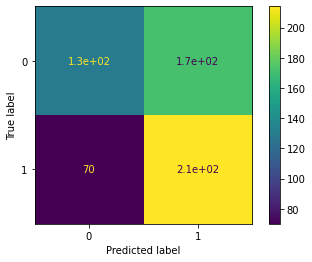

In [21]:
plot_confusion_matrix(model,x_test,y_test)

In [22]:
precision_score(y_test,y_pred)

0.5544041450777202

In [23]:
recall_score(y_test,y_pred)

0.7535211267605634

In [24]:
f1_score(y_test,y_pred)

0.6388059701492538